In [50]:
import os 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
train_dir = "train"
test_dir = "test"
validation_dir = "validation"

In [52]:
IMAGE_HEIGHT=224
IMAGE_WEIGHT=224
BATCH_SIZE=32
EPOCHS=10

In [53]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

train_gen = train_data_gen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    target_size=(IMAGE_HEIGHT,IMAGE_WEIGHT),
    class_mode="categorical"   
)

test_gen = test_data_gen.flow_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMAGE_HEIGHT,IMAGE_WEIGHT),
    class_mode="categorical",
    shuffle=False
)

validation_gen = validation_data_gen.flow_from_directory(
    validation_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMAGE_HEIGHT,IMAGE_WEIGHT),
    class_mode="categorical",
)

Found 1260 images belonging to 3 classes.
Found 360 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [54]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape = (IMAGE_HEIGHT,IMAGE_WEIGHT,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

d:\Reyad's Projects\Test Project\Snake Gourd Classification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model.fit(train_gen,epochs=EPOCHS,validation_data=validation_gen)

d:\Reyad's Projects\Test Project\Snake Gourd Classification\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 302ms/step - accuracy: 0.3865 - loss: 1.3581 - val_accuracy: 0.6389 - val_loss: 0.9527
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 288ms/step - accuracy: 0.5667 - loss: 0.8728 - val_accuracy: 0.6722 - val_loss: 0.6800
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 291ms/step - accuracy: 0.6706 - loss: 0.7032 - val_accuracy: 0.7444 - val_loss: 0.6112
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 292ms/step - accuracy: 0.7190 - loss: 0.6877 - val_accuracy: 0.7889 - val_loss: 0.5032
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 290ms/step - accuracy: 0.8341 - loss: 0.4664 - val_accuracy: 0.8444 - val_loss: 0.3991
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 289ms/step - accuracy: 0.8524 - loss: 0.3901 - val_accuracy: 0.8222 - val_loss: 0.3815
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 290ms/step - accuracy: 0.8421 - loss: 0.4043 - val_accuracy: 0.8222 - val_loss: 0.4177
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 288ms/step - accuracy: 0.8905 - loss: 0.2993 - val_accu

In [56]:
test_loss, test_acc = model.evaluate(test_gen)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.8750 - loss: 0.3085


In [57]:
true_labels=test_gen.classes
pred_prob=model.predict(test_gen)
pred_labels=np.argmax(pred_prob,axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step


In [58]:
test_gen.class_indices

{'Anthracnose': 0, 'Healthy': 1, 'Yellow': 2}

In [59]:
class_names = ['Anthracnose', 'Healthy', 'Yellow']

In [60]:
print("\nClassifcation Result \n")
print(classification_report(true_labels, pred_labels, target_names=class_names))


Classifcation Result 

              precision    recall  f1-score   support

 Anthracnose       0.95      0.87      0.90       120
     Healthy       0.84      0.97      0.90       120
      Yellow       0.85      0.79      0.82       120

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.87       360
weighted avg       0.88      0.88      0.87       360



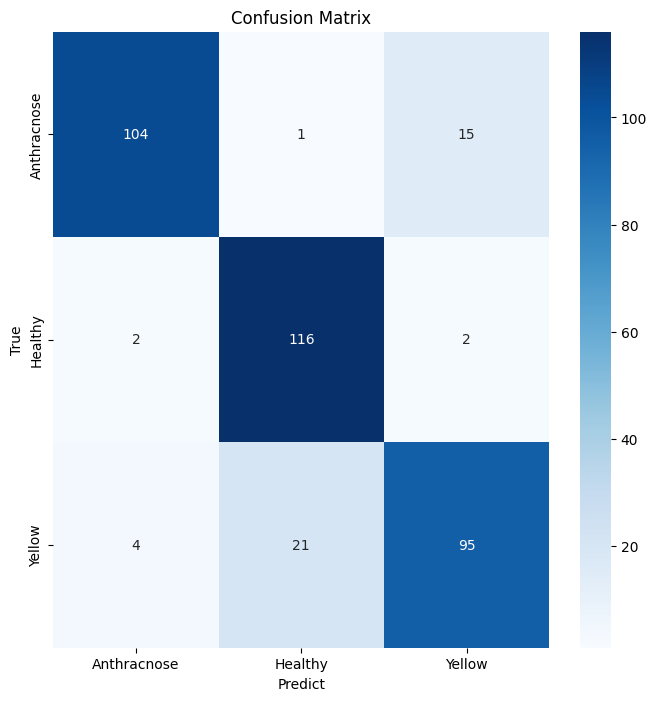

In [61]:
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predict")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [62]:
model.save("snake_gourd_leaf_model.h5")
print("Model saved")

Model saved


In [63]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

model = tf.keras.models.load_model("snake_gourd_leaf_model.h5")

class_labels = ['Anthracnose', 'Healthy', 'Yellow']

In [64]:
img_path = "angular-leaf-spot-1.jpg"

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array/255.0

pred = model.predict(img_array)
predicted_class = class_labels[np.argmax(pred)]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: Anthracnose


In [65]:
img_path = "anthracnose-gourds-2.jpg"

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array/255.0

pred = model.predict(img_array)
predicted_class = class_labels[np.argmax(pred)]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Yellow
